In [12]:
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point,Polygon,shape
import re

In [28]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站经纬度.csv',encoding='gb2312')
df

,name,categories,街镇名,lat,lng
0,江杨北路,居住区,杨行镇,31.409674,121.435220
1,铁力路,混合区,杨行镇,31.409685,121.456757
2,美兰湖,居住区,罗店镇,31.403678,121.345334
3,友谊路,混合区,友谊路街道,31.406039,121.471343
4,富锦路,居住区,杨行镇,31.394078,121.420009
...,...,...,...,...,...
315,临港大道,混合区,申港街道,30.925876,121.906772
316,滴水湖,混合区,申港街道,30.909291,121.925831
317,野生动物园,居住区,宣桥镇,31.052450,121.695519
318,醉白池,居住区,岳阳街道,31.003732,121.224626


In [22]:
df.query('name=="九亭"')

,name,categories,街镇名,lat,lng
275,九亭,居住区,九亭镇,31.13923,121.315003


In [70]:
#爬取单个,1代表wgs84坐标
ak = '***********' #秘钥
url='http://api.map.baidu.com/place/v2/search?query=公交线路&location='+str(df.lat[275])+','+str(df.lng[275])+'&coord_type=1&output=json&radius=1000&ak='+ak

In [71]:
req=requests.get(url)
data=json.loads(req.text)
data

{'status': 0,
 'message': 'ok',
 'result_type': 'poi_type',
 'results': [{'name': '九亭地铁站',
   'location': {'lat': 31.144176, 'lng': 121.325849},
   'address': '199路;706路;706路区间;797路;1840路内圈[往九杜路方向];1840路外圈[往涞亭路方向];1842路;1843路;沪陈线;沪松线;松江40路内圈[地铁1号口方向];松江40路外圈[地铁4号口方向];松江41路;松江42路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向];松江44路;松江68路;松江84路;松江89路',
   'province': '上海市',
   'city': '上海市',
   'area': '松江区',
   'detail': 0,
   'uid': 'c64688db23807148f8dc85c1'},
  {'name': '沪亭北路沪松公路',
   'location': {'lat': 31.146375, 'lng': 121.326461},
   'address': '198路;706路;706路区间;797路;1840路内圈[往九杜路方向];1840路外圈[往涞亭路方向];1841路;1843路;虹桥枢纽10路九亭区间;沪陈线;松江41路;松江42路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向];松江68路;松江84路;松江89路',
   'province': '上海市',
   'city': '上海市',
   'area': '松江区',
   'detail': 0,
   'uid': 'eb230d8634f05a15465726fb'},
  {'name': '沪亭南路蒲汇路',
   'location': {'lat': 31.143107, 'lng': 121.330309},
   'address': '松江40路内圈[地铁1号口方向];松江41路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向]',
   'province': '上海市',
   'city': '上海市',
   '

In [72]:
re.findall("address':\s'(.*?),",str(data))

["199路;706路;706路区间;797路;1840路内圈[往九杜路方向];1840路外圈[往涞亭路方向];1842路;1843路;沪陈线;沪松线;松江40路内圈[地铁1号口方向];松江40路外圈[地铁4号口方向];松江41路;松江42路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向];松江44路;松江68路;松江84路;松江89路'",
 "198路;706路;706路区间;797路;1840路内圈[往九杜路方向];1840路外圈[往涞亭路方向];1841路;1843路;虹桥枢纽10路九亭区间;沪陈线;松江41路;松江42路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向];松江68路;松江84路;松江89路'",
 "松江40路内圈[地铁1号口方向];松江41路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向]'",
 "706路;706路区间;1842路;松江40路内圈[地铁1号口方向];松江40路外圈[地铁4号口方向];松江41路;松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向]'",
 "199路'",
 "1840路内圈[往九杜路方向];1840路外圈[往涞亭路方向];1843路;沪陈线;松江42路;松江44路;松江84路'",
 "1842路'",
 "706路;706路区间;1842路;松江40路内圈[地铁1号口方向];松江40路外圈[地铁4号口方向]'",
 "松江84路;松江89路'",
 "松江43路内圈[地铁1号口方向];松江43路外圈[地铁4号口方向]'"]

In [73]:
len(re.findall("(\d+路)",str(data)))

63

In [74]:
print(re.findall("(\d+路)",str(data)))

['199路', '706路', '706路', '797路', '1840路', '1840路', '1842路', '1843路', '40路', '40路', '41路', '42路', '43路', '43路', '44路', '68路', '84路', '89路', '198路', '706路', '706路', '797路', '1840路', '1840路', '1841路', '1843路', '10路', '41路', '42路', '43路', '43路', '68路', '84路', '89路', '40路', '41路', '43路', '43路', '706路', '706路', '1842路', '40路', '40路', '41路', '43路', '43路', '199路', '1840路', '1840路', '1843路', '42路', '44路', '84路', '1842路', '706路', '706路', '1842路', '40路', '40路', '84路', '89路', '43路', '43路']


## 爬取线路 

In [29]:
#获取一千米范围内公交线路的数量
def get_line(lat,lng):
    ak = '************' #秘钥
    url='http://api.map.baidu.com/place/v2/search?query=公交线路&location='+str(lat)+','+str(lng)+'&coord_type=1&output=json&radius=800&ak='+ak
    req=requests.get(url)
    data=json.loads(req.text)
    data=data['results']
    station=re.findall("(\d+路)",str(data))
    station_num=len(station)
    return station_num

In [30]:
result=[]
for i in range(0,len(df)):
    result.append(pd.Series(get_line(df.lat[i],df.lng[i]),index=[df.name[i]]))
final=pd.concat(result,0)
final=final.reset_index()
final.columns=['name','line_num']
final

,name,line_num
0,江杨北路,25
1,铁力路,15
2,美兰湖,30
3,友谊路,27
4,富锦路,22
...,...,...
315,临港大道,20
316,滴水湖,17
317,野生动物园,17
318,醉白池,49


In [31]:
bus_line=pd.merge(df,final,on='name',how='left')
bus_line

,name,categories,街镇名,lat,lng,line_num
0,江杨北路,居住区,杨行镇,31.409674,121.435220,25
1,铁力路,混合区,杨行镇,31.409685,121.456757,15
2,美兰湖,居住区,罗店镇,31.403678,121.345334,30
3,友谊路,混合区,友谊路街道,31.406039,121.471343,27
4,富锦路,居住区,杨行镇,31.394078,121.420009,22
...,...,...,...,...,...,...
315,临港大道,混合区,申港街道,30.925876,121.906772,20
316,滴水湖,混合区,申港街道,30.909291,121.925831,17
317,野生动物园,居住区,宣桥镇,31.052450,121.695519,17
318,醉白池,居住区,岳阳街道,31.003732,121.224626,49


In [32]:
bus_line.to_clipboard(excel=True)

<BarContainer object of 75 artists>

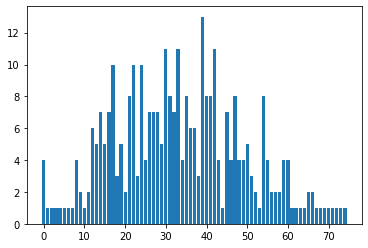

In [81]:
zz=bus_line.groupby('line_num').count()['name'].reset_index()
import matplotlib.pyplot as plt
plt.bar(zz.index,zz.name)

## 爬取数量 

In [97]:
#获取一千米范围内公交车站的数量
def get_station(lat,lng):
    ak = '*************' #秘钥
    url='http://api.map.baidu.com/place/v2/search?query=公交车站&location='+str(lat)+','+str(lng)+'&coord_type=1&output=json&radius=1000&ak='+ak
    req=requests.get(url)
    data=json.loads(req.text)
    data=data['results']
    station=re.findall("name': .(\w*)",str(data))
    station_num=len(station)
    return station_num

In [98]:
result=[]
for i in range(0,len(df)):
    result.append(pd.Series(get_station(df.lat[i],df.lng[i]),index=[df.name[i]]))
final=pd.concat(result,0)
final

江杨北路     10
铁力路       9
美兰湖      10
友谊路      10
富锦路       6
         ..
临港大道      6
滴水湖      10
野生动物园     6
醉白池      10
花木路      10
Length: 320, dtype: int64

In [107]:
final=final.reset_index()
final.columns=['name','station_num']
final

,name,station_num
0,江杨北路,10
1,铁力路,9
2,美兰湖,10
3,友谊路,10
4,富锦路,6
...,...,...
315,临港大道,6
316,滴水湖,10
317,野生动物园,6
318,醉白池,10


In [108]:
bus_station=pd.merge(df,final,on='name',how='left')
bus_station

,name,categories,街镇名,lat,lng,station_num
0,江杨北路,居住区,杨行镇,31.409674,121.435220,10
1,铁力路,混合区,杨行镇,31.409685,121.456757,9
2,美兰湖,居住区,罗店镇,31.403678,121.345334,10
3,友谊路,混合区,友谊路街道,31.406039,121.471343,10
4,富锦路,居住区,杨行镇,31.394078,121.420009,6
...,...,...,...,...,...,...
315,临港大道,混合区,申港街道,30.925876,121.906772,6
316,滴水湖,混合区,申港街道,30.909291,121.925831,10
317,野生动物园,居住区,宣桥镇,31.052450,121.695519,6
318,醉白池,居住区,岳阳街道,31.003732,121.224626,10


In [110]:
bus_station.to_clipboard(excel=True)

In [109]:
bus_station.station_num.value_counts()

10    291
3       5
8       5
9       5
6       4
7       4
5       3
0       1
2       1
4       1
Name: station_num, dtype: int64

In [64]:
req = requests.get(url)
t = req.text
data = json.loads(t) #把json格式转换成字典
data

{'status': 0,
 'message': 'ok',
 'result_type': 'poi_type',
 'results': [{'name': '潘家桥',
   'location': {'lat': 31.412021, 'lng': 121.457075},
   'address': '宝山10路;宝山87路;宝山8路',
   'province': '上海市',
   'city': '上海市',
   'area': '宝山区',
   'detail': 0,
   'uid': '3b66c0e486e315b324e0a010'},
  {'name': '盘古路铁峰路',
   'location': {'lat': 31.403825, 'lng': 121.459246},
   'address': '1609路',
   'province': '上海市',
   'city': '上海市',
   'area': '宝山区',
   'detail': 0,
   'uid': 'fd3530eefaed6dc66d20b941'},
  {'name': '铁力路富锦路',
   'location': {'lat': 31.412284, 'lng': 121.464958},
   'address': '宝山10路;宝山23路;宝山87路',
   'province': '上海市',
   'city': '上海市',
   'area': '宝山区',
   'detail': 0,
   'uid': 'de1913d0ef7a3ad12fb17ed2'},
  {'name': '铁力路湄浦路',
   'location': {'lat': 31.410377, 'lng': 121.465852},
   'address': '711路',
   'province': '上海市',
   'city': '上海市',
   'area': '宝山区',
   'detail': 0,
   'uid': 'fff2d97bb41a7b1bb04c494e'},
  {'name': '湄浦路铁力路',
   'location': {'lat': 31.41122, 'lng': 121.4

In [65]:
import re
re.findall("name': .(\w*)",str(data))

['潘家桥',
 '盘古路铁峰路',
 '铁力路富锦路',
 '铁力路湄浦路',
 '湄浦路铁力路',
 '江杨北路湄浦路',
 '友谊路铁山路',
 '盘古路江杨北路',
 '盘古路铁山路']

In [37]:
pd.json_normalize(data['results'])

,name,address,province,city,area,detail,uid,location.lat,location.lng
0,天安门东,1路;2路;52路;82路;120路;观光1线;观光2线;旅游公交1线;夜1路,北京市,北京市,东城区,0,e1ee3a5e7be676c8213bf257,39.914064,116.407991
1,南长街,5路;观光1线;观光2线,北京市,北京市,西城区,0,7640969dc56116662bd7ab38,39.915699,116.398226
2,天安门西,1路;5路;52路;观光1线;观光2线;旅游公交1线;夜1路,北京市,北京市,西城区,0,a8e23c622c11486eae045714,39.913727,116.398136
3,天安门广场西,2路;120路;观光1线;观光2线,北京市,北京市,西城区,0,e26209a3797dfab43ce23176,39.908736,116.402445
4,石碑胡同,52路,北京市,北京市,西城区,0,8a40f4373c75c1f883a00cdd,39.913676,116.395368
5,天安门广场东,2路;5路;120路;观光2线,北京市,北京市,东城区,0,bc3118720ad264138a36ee6f,39.907989,116.405971
6,南河沿,2路;60路;82路;观光1线;夜2路,北京市,北京市,东城区,0,8c7f633abc8eb39234b06c64,39.916709,116.413187
7,西华门,5路;观光1线;观光2线,北京市,北京市,西城区,0,0ed941909e26258af8dc8509,39.921382,116.397756
8,东华门,观光2线,北京市,北京市,东城区,0,7fb4e1c2481faf46f90cad26,39.921518,116.410029
9,前门东,8路;9路;20路;44路内环;44路外环;142路[原特2路];622路;首都机场大巴北京...,北京市,北京市,东城区,0,c11a80543983cb6f5b109346,39.906843,116.408132


In [35]:
data['results']

{'name': '天安门东',
 'location': {'lat': 39.914064, 'lng': 116.407991},
 'address': '1路;2路;52路;82路;120路;观光1线;观光2线;旅游公交1线;夜1路',
 'province': '北京市',
 'city': '北京市',
 'area': '东城区',
 'detail': 0,
 'uid': 'e1ee3a5e7be676c8213bf257'}